<a href="https://colab.research.google.com/github/UQROO-MarianaJetzuvelyGarciaHau/Colab-Tareas/blob/main/Ej_1_Comparaci%C3%B3n_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Comparación de Modelos de Clasificación

Objetivo: Comparar el rendimiento de tres algoritmos de clasificación: Regresión Logística, Árbol de Decisión y Random Forest.

Pasos:

1. Cargar un conjunto de datos de clasificación (por ejemplo, breast cancer de scikit-learn).

2. Dividir el conjunto de datos en entrenamiento y prueba.

3. Entrenar los tres modelos.

4. Evaluar cada modelo usando accuracy, precision, recall y F1-score.

5. Visualizar los resultados en gráficos comparativos.

Código en Python:


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        63
           1       0.97      0.92      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171

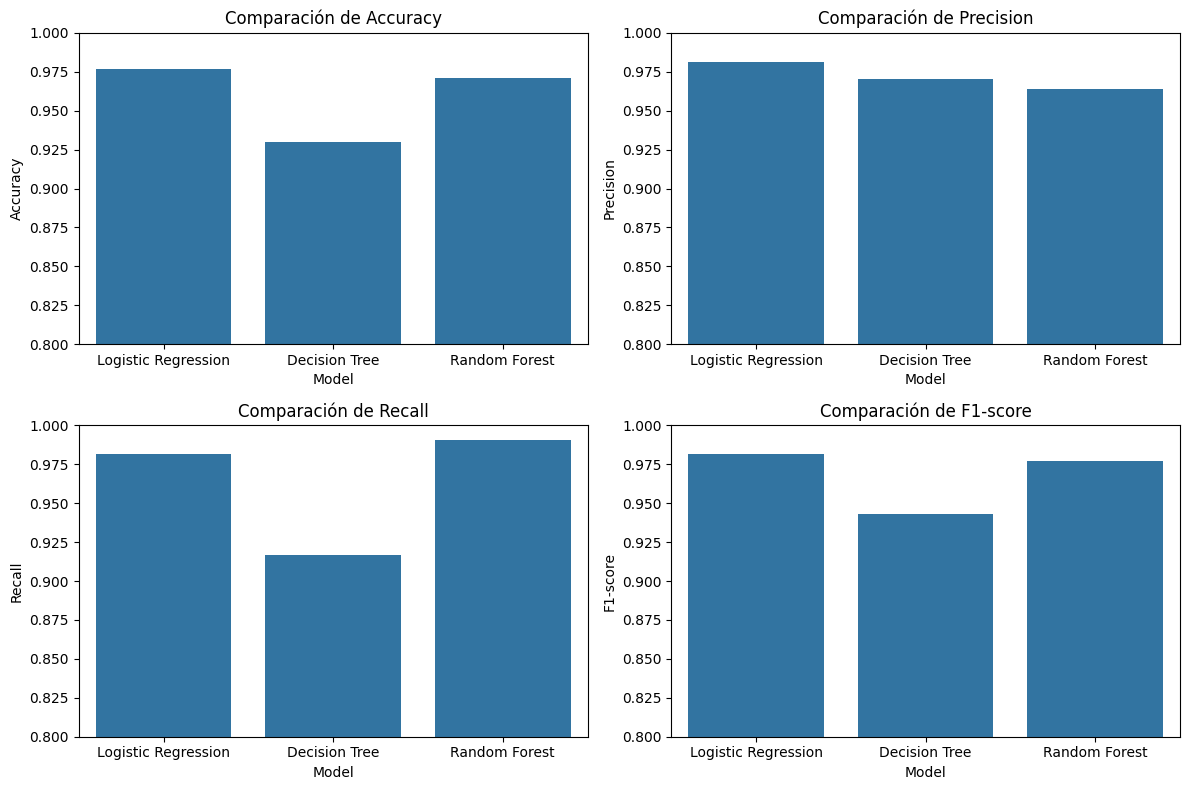

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000), # Aumentado max_iter
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Diccionario para almacenar los resultados
results = []

# Entrenar y evaluar
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar resultados
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)
print("\n--- Resumen de Métricas ---")
print(results_df)

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Bar plot para Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparación de Accuracy")
plt.ylim(0.8, 1.0)

# Bar plot para Precision
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", data=results_df)
plt.title("Comparación de Precision")
plt.ylim(0.8, 1.0)

# Bar plot para Recall
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", data=results_df)
plt.title("Comparación de Recall")
plt.ylim(0.8, 1.0)

# Bar plot para F1-score
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-score", data=results_df)
plt.title("Comparación de F1-score")
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

Preguntas de reflexión:

¿Cuál modelo obtuvo el mejor F1-score?

Con base en la gráfica y el resumen de métricas, se observa que el modelo de Regresión Logística obtuvo el mejor valor de F1-score, con un resultado de 0.981481 (aproximadamente 0.98).

¿Qué diferencias observas entre precisión y recall en cada modelo?

En general, los tres modelos presentan un buen rendimiento, aunque con diferentes equilibrios entre precisión y recall. La Regresión Logística muestra el mejor balance entre ambas métricas, con valores cercanos a 0.98, lo que muestra un modelo estable y confiable. En cambio, el Árbol de Decisión presenta una mayor precisión (0.97) pero un menor recall (0.92), indicando que detecta menos casos positivos reales. Por otro lado, el Random Forest alcanza un recall más alto (0.99) y una precisión ligeramente menor (0.96), lo que indica que identifica casi todos los casos positivos, aunque con un leve aumento en las falsas alarmas. Por lo que, la Regresión Logística ofrece el rendimiento más equilibrado, mientras que el Random Forest prioriza la detección de positivos y el Árbol de Decisión la exactitud en las predicciones positivas.

¿Qué modelo recomendarías para este problema y por qué?

Recomiendo el modelo de Regresión Logística, ya que obtuvo el mejor desempeño general con un F1-score de 0.981481 y un accuracy de 0.976608, mostrando un excelente equilibrio entre precisión (0.98) y recall (0.98). Este equilibrio es fundamental en un problema médico, porque permite identificar correctamente la mayoría de los casos positivos sin generar demasiados falsos positivos. Además, la Regresión Logística es un modelo simple, interpretable y eficiente, lo que facilita entender qué variables influyen en la predicción, algo esencial en el ámbito clínico.

Recomendaciones: Utiliza gráficos de barras para visualizar las métricas y facilitar la comparación.